# PRAKTIKUM 1

KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah
k
k yang dipilih. Proses KMeans secara manual, dapat dilihat pada tautan berikut,

Perhitungan Manual KMeans

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Mesin Learning/iris.csv')

df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [ ]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

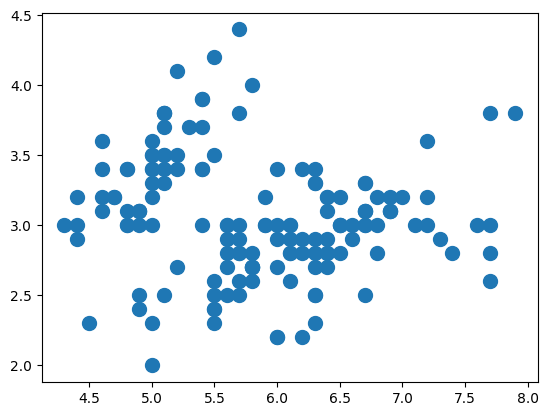

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

 Kode ini menghasilkan scatter plot untuk dua fitur pertama dari dataset, yang berguna untuk melihat distribusi atau pola dalam data, seperti apakah ada cluster atau korelasi antara kedua fitur tersebut.

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

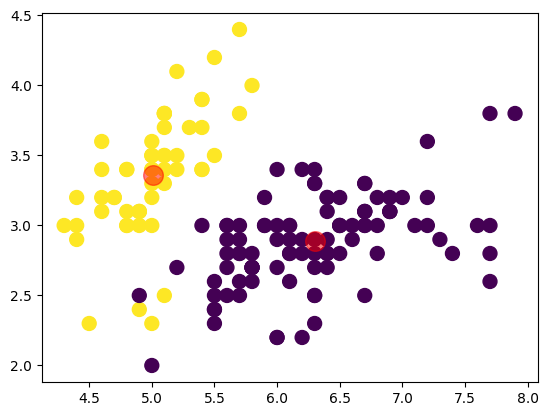

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


Kode ini mencetak nilai SSE (Sum of Squared Errors) dari model KMeans untuk memberikan wawasan mengenai seberapa efektif model KMeans dalam mengelompokkan data ke dalam cluster yang telah ditentukan (dalam hal ini, 2 cluster).

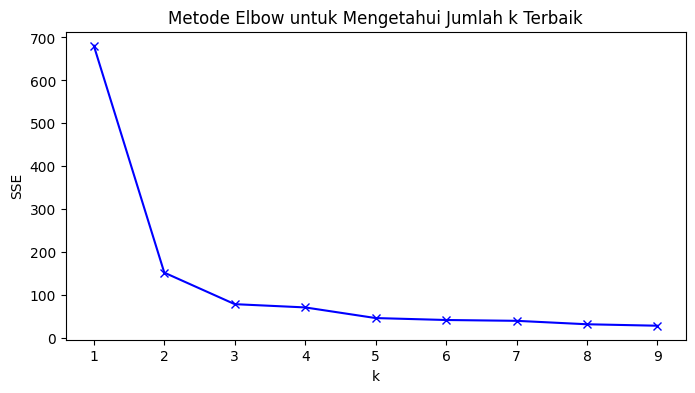

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=71.34044682436698
k=5; SSE=46.56163015873017
k=6; SSE=42.05284622728318
k=7; SSE=40.123733225762294
k=8; SSE=32.120510101010105
k=9; SSE=28.724419921409854


# PRAKTIKUM 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

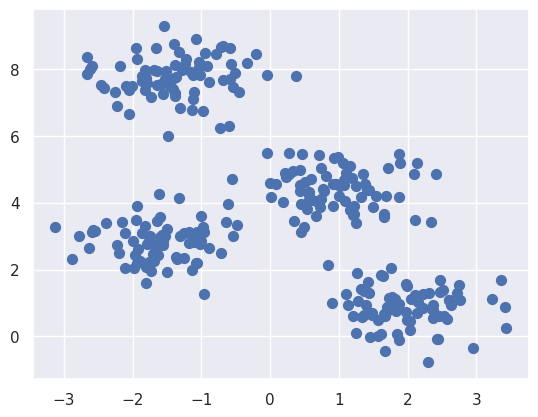

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

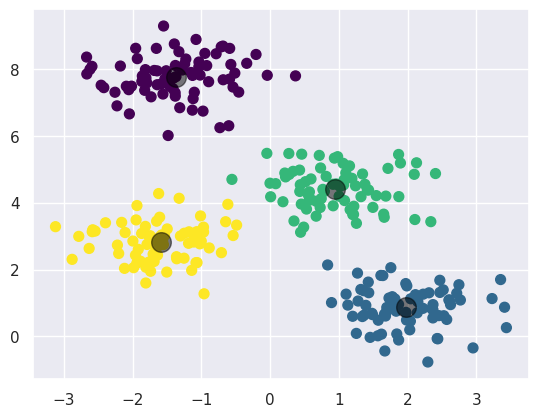

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

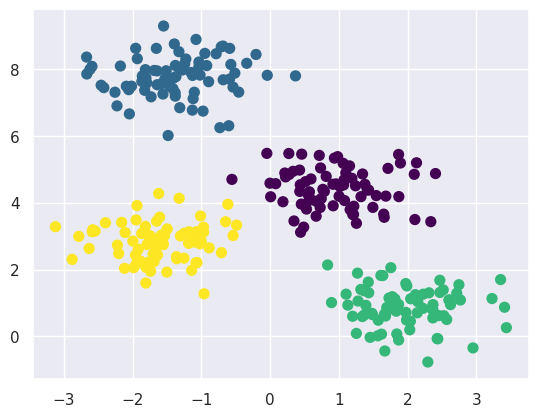

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

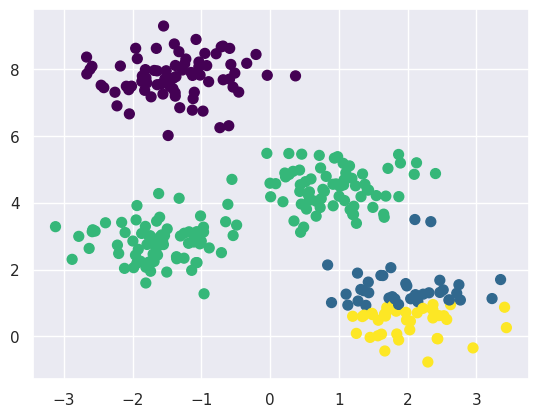

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

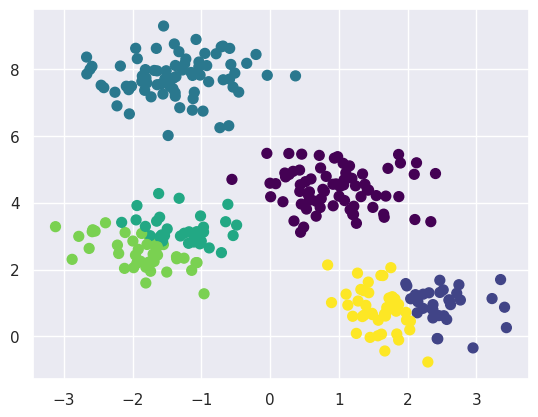

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

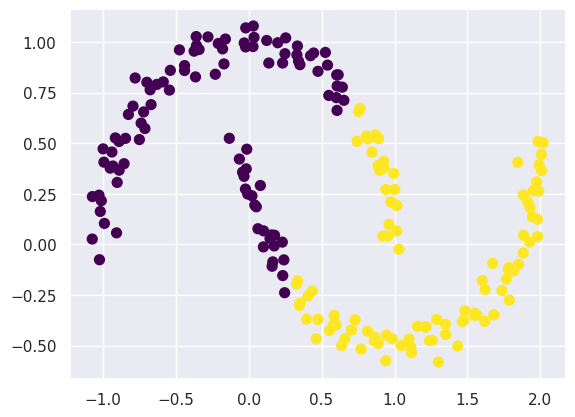

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


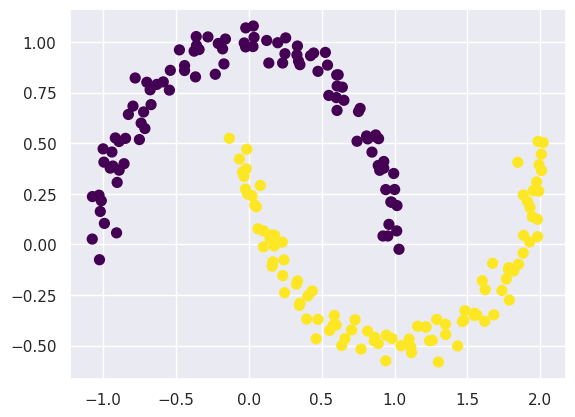

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

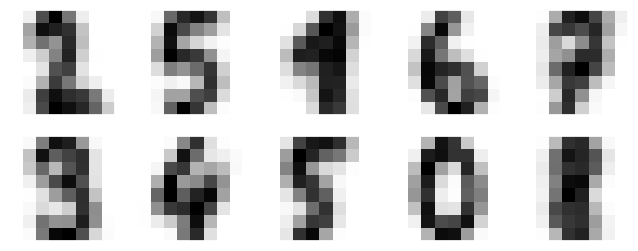

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

* fig, ax = plt.subplots(2, 5, figsize=(8, 3)): Membuat figure dan axes (2 baris dan 5 kolom) untuk menampilkan 10 gambar dalam tata letak grid.
* figsize=(8, 3): Menentukan ukuran total dari figure, di mana lebar adalah 8 inci dan tinggi 3 inci.
* centers = kmeans.cluster_centers_.reshape(10, 8, 8):

* kmeans.cluster_centers_: Mengakses pusat cluster hasil dari model K-Means. Setiap pusat cluster direpresentasikan sebagai vektor dengan panjang 64 (sesuai dengan jumlah fitur atau piksel dari gambar 8x8).
* reshape(10, 8, 8): Mengubah pusat cluster yang awalnya berupa vektor 1D (64 elemen) menjadi bentuk 2D (8x8) agar dapat divisualisasikan sebagai gambar. Di sini, kita punya 10 pusat cluster, masing-masing berbentuk gambar 8x8.
* for axi, center in zip(ax.flat, centers):: Melakukan iterasi melalui setiap subplot (axi) dan setiap pusat cluster (center). ax.flat adalah cara untuk mengakses semua subplot (total 10) dalam bentuk array 1D.
* zip(ax.flat, centers): Menggabungkan subplot dengan pusat cluster sehingga kita dapat menampilkan setiap pusat cluster pada subplot yang sesuai.
* axi.set(xticks=[], yticks=[]): Menghapus label sumbu x dan y dari subplot (supaya lebih bersih dan fokus pada gambar).
* axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary):

* axi.imshow(center): Menampilkan pusat cluster sebagai gambar 8x8 pada subplot axi.
* interpolation='nearest': Mengatur jenis interpolasi gambar, yang dalam hal ini adalah 'nearest' untuk menjaga agar setiap piksel ditampilkan tanpa interpolasi yang halus.
* cmap=plt.cm.binary: Menggunakan skema warna biner (hitam-putih) untuk menampilkan gambar.

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

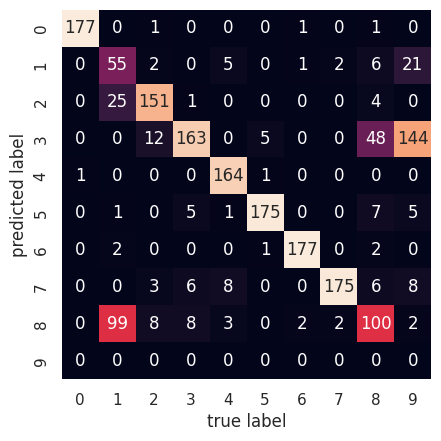

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

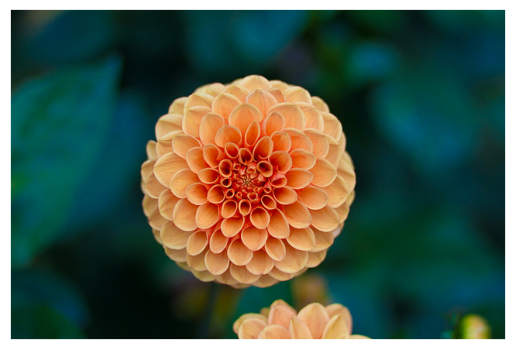

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

Kode flower.shape digunakan untuk mengetahui dimensi atau bentuk dari gambar yang disimpan dalam variabel flower.

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Kode ini pertama-tama menormalisasi nilai warna gambar, kemudian mengubah data gambar 3D menjadi array 2D dengan satu piksel per baris dan tiga kolom untuk kanal warna (RGB). data.shape akan mengembalikan bentuk baru yaitu (273280, 3), yang berarti ada 273,280 piksel dalam gambar, masing-masing dengan tiga nilai warna (RGB).

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

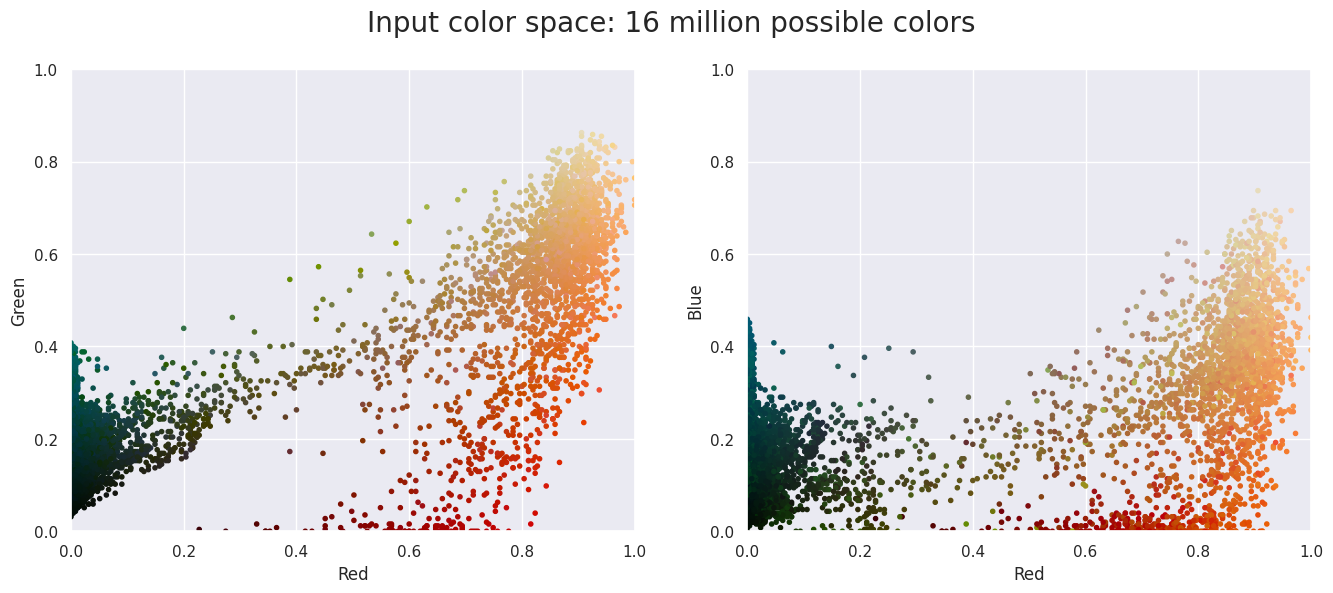

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

1. plot_pixels(data, ...)
Memanggil fungsi plot_pixels dengan parameter data dan title.
data adalah array yang berisi informasi warna piksel gambar yang telah dinormalisasi (nilai piksel dibagi dengan 255 sehingga berada dalam rentang 0 hingga 1). Dalam konteks ini, data berisi informasi tentang warna setiap piksel dari gambar yang akan divisualisasikan.
2. title='Input color space: 16 million possible colors'
Menetapkan parameter title untuk fungsi tersebut, yang akan menjadi judul dari plot. Judul ini menjelaskan bahwa ruang warna input memiliki 16 juta kemungkinan warna.

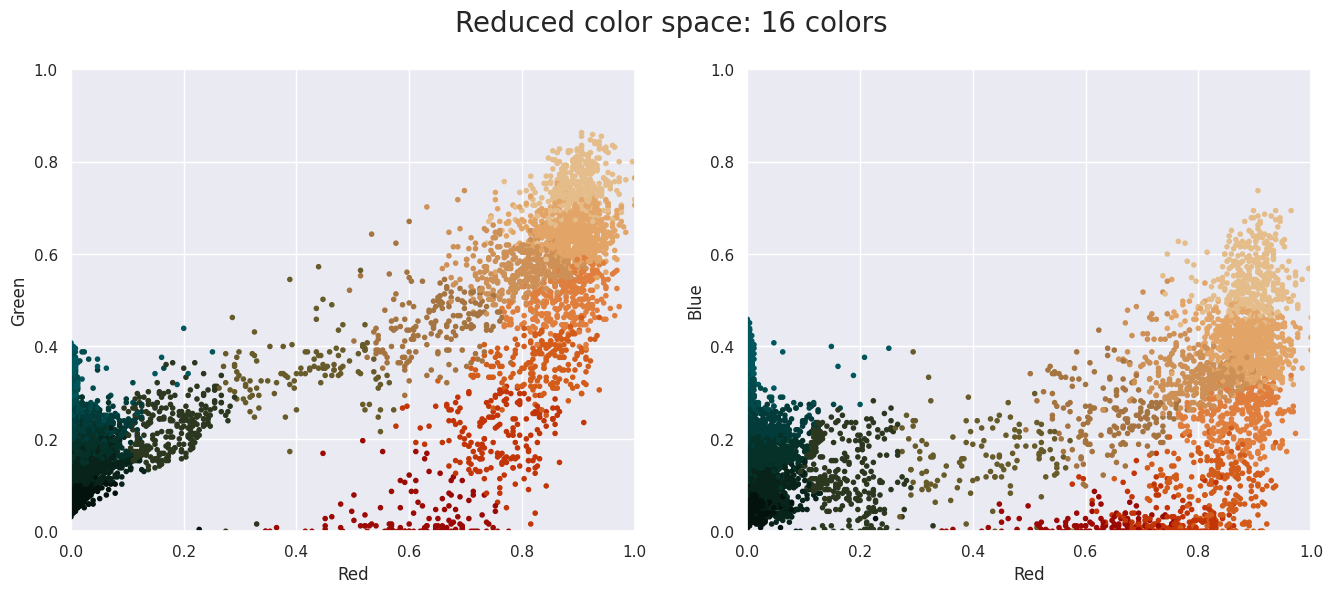

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

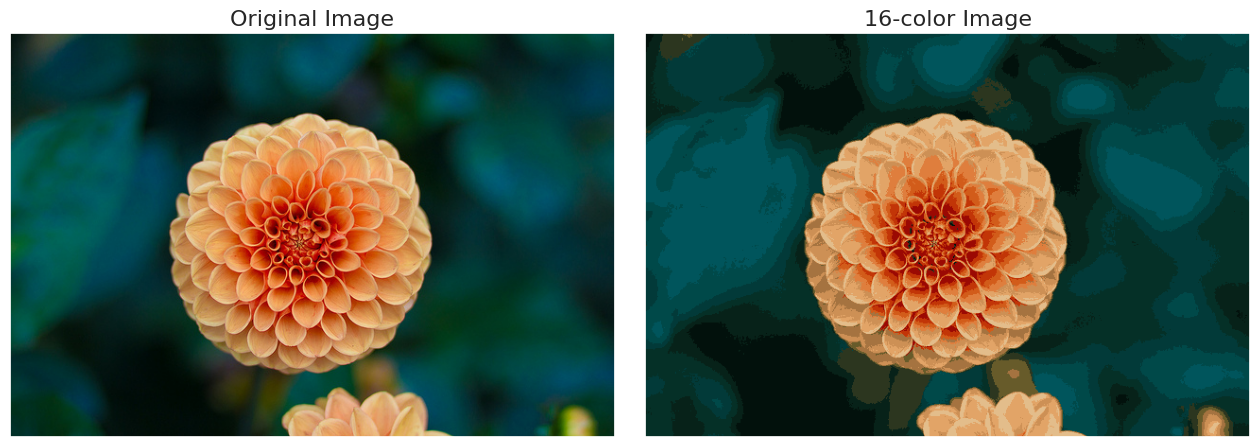

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# PRAKTIKUM 3

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=b586f9f148256b1f2349bbe8948e2e5d6475f49b5342d1f9669533f24ba1ad05
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

In [ ]:
# Normalisasi data
data = data / data.max(axis=0)

In [ ]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

In [ ]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

In [ ]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

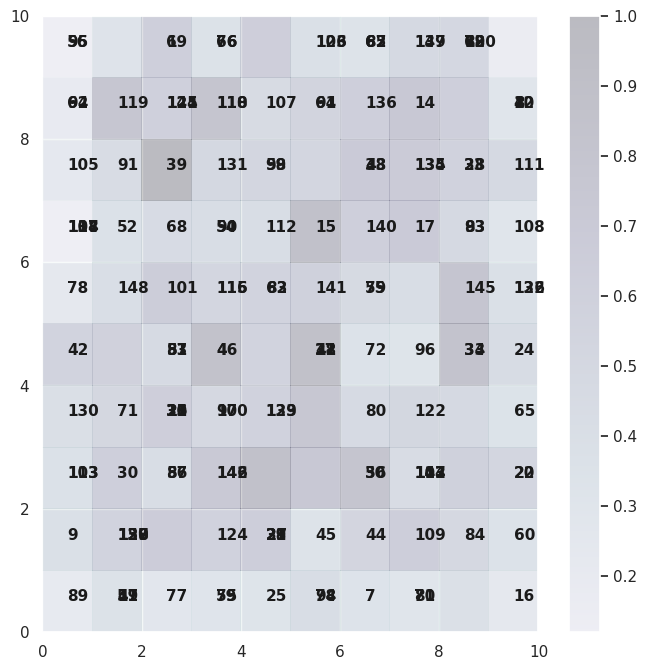

In [ ]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

1. plt.figure(figsize=(8, 8)): Membuat sebuah figure baru untuk plot dengan ukuran 8x8 inci.
2. for i, x in enumerate(data):: Melakukan iterasi melalui setiap sampel data. enumerate(data) memberikan indeks i dan nilai x untuk setiap sampel dalam dataset.
3. w = som.winner(x): Menggunakan metode winner dari objek SOM untuk menentukan neuron pemenang (BMU) untuk setiap sampel x.
w akan berisi indeks dari neuron pemenang dalam format (baris, kolom).
4. plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11}): Menambahkan teks pada plot untuk menunjukkan indeks dari setiap sampel data.
w[0]+.5 dan w[1]+.5 menggeser posisi teks sedikit ke tengah dari neuron pemenang, sehingga lebih mudah terbaca.
str(i+1) mengkonversi indeks sampel ke string untuk ditampilkan.
color='k' mengatur warna teks menjadi hitam.
fontdict={'weight': 'bold', 'size': 11} mengatur gaya dan ukuran font teks.
5. plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2): Menggambar peta jarak dari SOM menggunakan pcolor.
som.distance_map() menghasilkan peta jarak antar neuron dalam SOM, yang menunjukkan seberapa jauh bobot neuron satu dengan yang lainnya.
.T mentranspose peta jarak agar sesuai dengan orientasi yang diinginkan untuk plot.
cmap='bone_r' memilih skema warna untuk peta (dalam hal ini, palet warna 'bone' dengan inverted).
alpha=.2 mengatur transparansi peta agar elemen lainnya (teks) tetap terlihat.
6. plt.colorbar(): Menambahkan colorbar ke plot untuk menunjukkan skala warna dari peta jarak.
7. plt.show(): Menampilkan plot yang telah dibuat.

# PRAKTIKUM 4

In [ ]:
pip install minisom

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [ ]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [ ]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [ ]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [ ]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "Lenna.png"
Lenna = io.imread('/content/drive/MyDrive/Mesin Learning/Lenna.png') / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

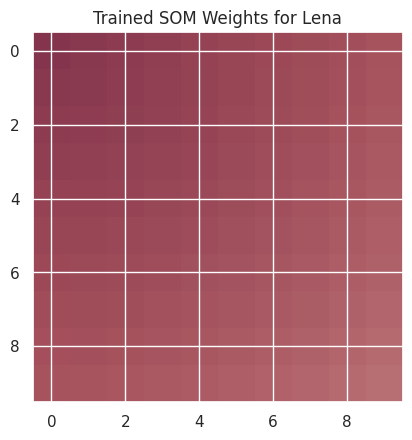

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

# TUGAS

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Memuat data dari 'Mall_Customers.csv'
data = pd.read_csv('/content/drive/MyDrive/Mesin Learning/Mall_Customers.csv')

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [3]:
# Pilih fitur yang ingin digunakan untuk clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# Menentukan jumlah kluster yang diinginkan
num_clusters = 3  # Mengganti nilai menjadi 3

In [5]:
# Membuat model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

In [6]:
# Melatih model K-Means
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [7]:
# Menambahkan label kluster ke data
data['Cluster'] = kmeans.labels_

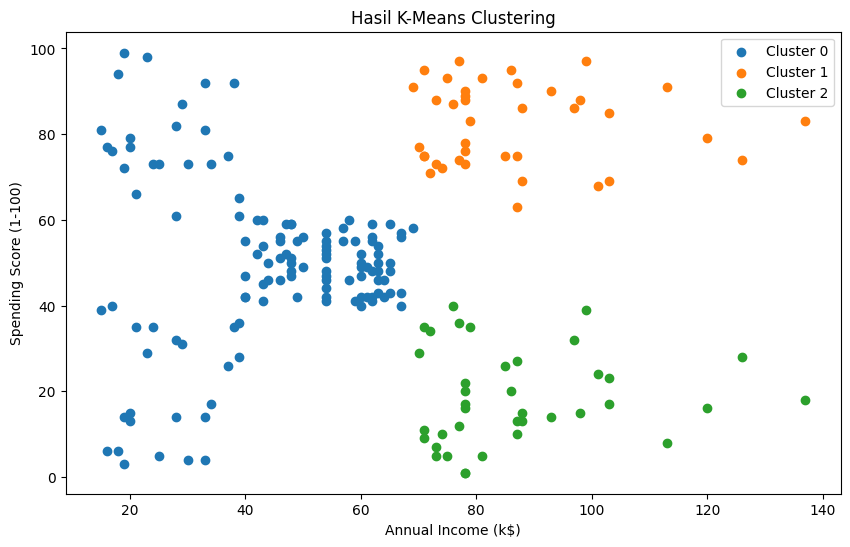

In [8]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil K-Means Clustering')
plt.legend()
plt.show()


3. Buatlah model K-Means dengan mempertimbangkan jumlah k
k yang terbaik.

In [9]:
# Menghilangkan kolom yang tidak diperlukan
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
# Menyimpan inersia (within-cluster sum of squares) untuk berbagai jumlah kluster
inertia = []
for k in range(1, 11):  # Coba jumlah kluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

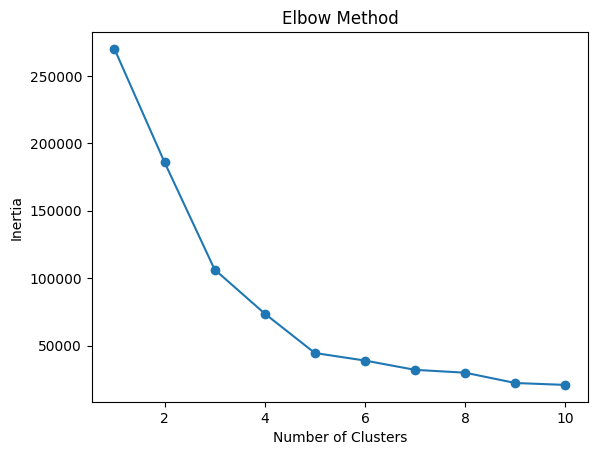

In [11]:
# Memplot inersia
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [14]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=3e978fb6a3eb10761625548d1c4d9ee7c69a7fe2159d659d3d2a79c6b1a03a28
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [15]:
# Import Library
import cv2 as cv
import numpy as np
from minisom import MiniSom
from PIL import Image

In [16]:
image_path = "/content/drive/MyDrive/Mesin Learning/pinguin.jpg"
img = Image.open(image_path)
img_data = np.asarray(img)
img_data = img_data / 255.0  # Normalize pixel values to [0, 1]

In [17]:
flat_img_data = img_data.reshape(-1, 3)

In [18]:
som_dim = 10
som = MiniSom(som_dim, som_dim, 3, sigma=0.3, learning_rate=0.5)

In [19]:
som.train_random(flat_img_data, 100)
segmented_img = np.zeros_like(flat_img_data)

In [20]:
for i, x in enumerate(flat_img_data):
    winner = som.winner(x)
    weights = som.get_weights()[winner[0], winner[1]]
    segmented_img[i] = weights

In [21]:
segmented_img = segmented_img.reshape(img_data.shape)

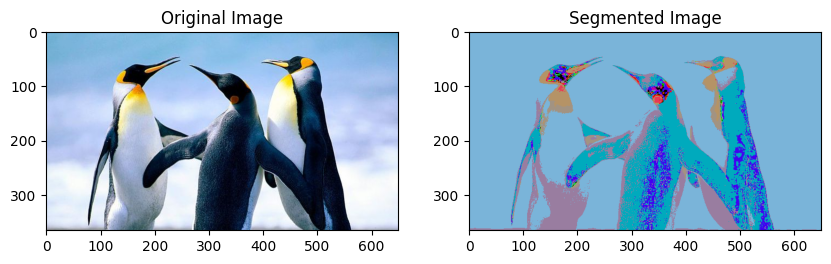

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.show()